Lambda School Data Science

*Unit 4, Sprint 2, Module 1*

---

# Neural Networks (Prepare)

## Learning Objectives
* <a href="#p1">Part 1</a>: Describe the foundational components of a neural network
* <a href="#p2">Part 2</a>: Implement a Perceptron from scratch in Python

Neural Networks are a whole new area of study and application that can be intimidating, but which represents some of the most powerful tools and techniques that we possess in machine learning today. In spite of the hype surrounding these topics I hope that you will come to see them as just another tool in your tool bag with their own strengths and weaknesses. They are useful, but they are not a silver bullet, and they are not always preferable to other -perhaps more simple- machine learning methods. 

The goal of this week is to familiarize you with the fundamental theory, terminology and libraries that will enable you to approach different neural network architectures (called topologies) in a sophisticated manner. This week will not be a run-through of the history of Neural Networks and each of the individual advancements leading up to current technologies -we don't have time for that. We will spend some time on some older methods, but only to the degree that they will help introduce us to relevant terminology and understand more complex versions of these technologies.

# Foundational Components of Neural Networks (Learn)
<a id="p1"></a>

## Overview

Neural Networks aren't exactly a new technology, but recent breakthroughs have revitalized the area. The idea using math to represent the brain has been around since 1943, and the "Perceptron" - one of the basic building blocks of the technology- was invented in 1958. 

Artificial Neural Networks are a computational model that was inspired by how neural networks in the brain process information. In the brain electrochemical signals flow from earlier neurons through the dendrites of the cell toward the cell body. If the received signals surpass a certain threshold with a given timing then the neuron fires sending a large spike of energy down the axon and through the axon terminals to other neurons down the line. 

![Wikipedia Neuron Diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/500px-Neuron.svg.png)

In Artificial Neural Networks the neurons or "nodes" are similar in that they receive inputs and pass on their signal to the next layer of nodes if a certain threshold is reached, but that's about where the similarities end. Remember that ANNs are not brains. Don't fall into the common trap of assuming that if an Artificial Neural Network has as many nodes as the human brain that it will be just as powerful or just as capable. The goal with ANNs is not to create a realistic model of the brain but to craft robust algorithms and data structures that can model the complex relationships found in data.

## Follow Along

Say you want to buy a house, you're quoted $400,000 for a 2000 square foot house. Is that good? Is that bad? How can we know? Well, we can gather up some more prices of other homes in the area and their square footages to compare.

| Square Footage | Price  |
|----------------|--------|
| 2104           | 399900 |
| 1600           | 329900 |
| 2400           | 369000 |

Ok, so now we have a little bit more data to compare to, how can we compare the price that we're getting to the prices of these houses? We can't compare price directly because all of these homes are different sizes, so we decide to calculate an average price per square foot for these three homes and we'll compare that to the average square footage price for the house that we have been looking at.

What does our neural network predict should be the price of the house that we are looking at?

In [1]:
price = 2000 * 180
print(price)

360000


### Node Maps

We've created our first *extremely* basic neural network, it takes an input, modifies it by a weight (180) and reports an output. Please, instead of thinking about neural networks as if they were brains think about them as a function or a "mapping" from inputs to outputs just like we have established many times before. 

![A Mapping](http://jalammar.github.io/images/NNs_formula_no_bias.png)

What we have here above is what's known as a "Node Map" it's a visual diagram of the architecture or "topology" of our neural network. It's kind of like a flow chart in that it shows the path from inputs to outputs. They are usually color coded and help us understand at a very high level, some of the differences in architecture between kinds of neural networks. Just like with all the areas of machine learning that we have studied before there is a "[zoo](http://www.asimovinstitute.org/neural-network-zoo/)" of neural network architectures:

![Neural Network Zoo](http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png)

  

### Types of Layers:

There are three main types of neuron layers in a typical NN topology:

#### Input or Visible Layers

The Input Layer is what receives input from our dataset. Sometimes it is called the visible layer because it's the only part that is exposed to our data and that our data interacts with directly. Typically node maps are drawn with one input node for each of the different inputs/features/columns of our dataset that will be passed to the network.

#### Hidden Layers

Layers after the input layer are called Hidden Layers. This is because they cannot be accessed except through the input layer. They're inside of the network and they perform their functions, but we don't directly interact with them. The simplest possible network is to have a single neuron in the hidden layer that just outputs the value. "Deep Learning" apart from being a big buzzword simply means that we are using a Neural Network that has multiple hidden layers. "Deep Learning" is a big part of the renewed hype around ANNs because it allows networks that are structured in specific ways to accomplish tasks that were previously out of reach (image recognition for example).  

#### Output Layers

The final layer is called the Output Layer. The purpose of the output layer is to output a vector of values that is in a format that is suitable for the type of problem that we're trying to address. Typically the output value is modified by an "activation function" to transform it into a format that makes sense for our context, here's a couple of examples:

- NNs applied to a regression problem might have a single output node with no activation function because what we want is an unbounded continuous value.

- NNS applied to a binary classification problem might use a sigmoid function as its activation function in order to squishify values down to represent a probability. Outputs in this case would represent the probability of predicting the primary class of interest. We can turn this into a class-specific prediction by rounding the outputted sigmoid probability up to 1 or down to 0. 

- NNS applied to multiclass classification problems might have multiple output nodes in the output layer, one for each class that we're trying to predict. This output layer would probably employ what's called a "softmax function" for accomplishing this. Don't worry about how that activation function works just yet, we'll get to it soon.


### Back to our House Problem

 Is a neural network that predicts home prices based on the average square footage of homes in the are a good one? How can we evaluate the quality of our predictions?
 
We evaluate the quality of our predictions just like we would any machine learning algorithm. We look at what the algorithm predicted and compare it to the actual price to see how far off we are. We know that our predictions are getting better if our predictions get closer to the actual prices in our training data / testing data. 

So how is our Neural Network doing?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

x = [2104, 1600, 2400]
y = [399.9, 329.9, 369]
predictions = [379, 288, 432]
difference = [21, 42, -63]
difference_squared = [449, 1756, 3969]

df = pd.DataFrame({'sqft': x, "price_in_thous": y, "predictions": predictions, 
                   "difference": difference, "diff_squared": difference_squared})
df.head()

,sqft,price_in_thous,predictions,difference,diff_squared
0,2104,399.9,379,21,449
1,1600,329.9,288,42,1756
2,2400,369.0,432,-63,3969


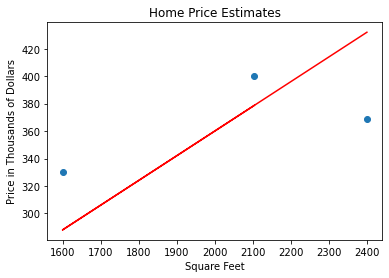

In [3]:
plt.scatter(df.sqft, df.price_in_thous)
plt.xlabel("Square Feet")
plt.ylabel("Price in Thousands of Dollars")
plt.title("Home Price Estimates")

# Plot the line
price_per_sqft = .180

y_hat = [price_per_sqft*x for x in df.sqft]
plt.plot(df.sqft, y_hat, color="red")

plt.show()

### Look Familiar?

Well it should because we've just plotted a regression line hypothesis based on the average square foot price of the three homes that we looked at. Our average error for this line is:

In [4]:
print("Mean Squared Error:", df.diff_squared.mean())

Mean Squared Error: 2058.0


Now, we didn't fit this line using any regression techniques so it's likely that it's **not** the line of best fit. But we could try out other lines and see if the error gets bigger or smaller. Well it just so happens that in this two dimensional world that if our line is stuck to the origin on one end then we don't have all of the freedom that we want to control our predictions. We need some way to slide it up and down the y axis so that we can make any line that we want in this two-dimensional world. This y-intercept is a constant value, or in other words it's always weighted by 1. We're going to call this y-intercept our "bias" term. We'll define this a little bit better in a minute. 

![New Network with Bias](http://jalammar.github.io/images/NNs_bias.png)

Now I don't love this diagram because it shows our "bias" term as if it was a new horizontal layer, in reality the bias term interacts with a single layer to affect all layers after the hidden layer that it is associated with. This diagram will give you a better idea: 

![Bias Terms](https://i.stack.imgur.com/6S6Bz.png)


In [5]:
import numpy as np

weight = .100
bias = 160

X = np.array([2104, 1600, 2400])
y = np.array([399.9, 329.9, 369])
predictions = [weight*x + bias for x in X]
print("Predictions:", predictions)
difference = y-predictions
print("Difference:", difference)
difference_squared = difference**2
print("Difference Squared:", difference_squared)
MSE = difference_squared.sum()/len(difference_squared)
print("Mean Squared Error", MSE)

Predictions: [370.4, 320.0, 400.0]
Difference: [ 29.5   9.9 -31. ]
Difference Squared: [870.25  98.01 961.  ]
Mean Squared Error 643.0866666666665


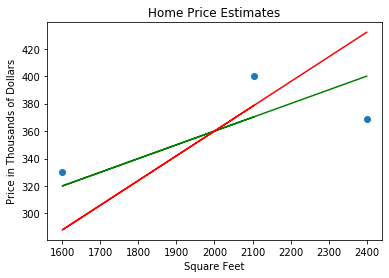

In [6]:
plt.scatter(X, y)
plt.xlabel("Square Feet")
plt.ylabel("Price in Thousands of Dollars")
plt.title("Home Price Estimates")

# Plot the line
price_per_sqft = .180

y_hat = [weight*x + bias for x in X]
plt.plot(X, y_hat, color="green")

y_hat = [price_per_sqft*x for x in df.sqft]
plt.plot(df.sqft, y_hat, color="red")

plt.show()

The bias value in coordination with our weight gives our network the full range of motion that it needs to find the best way to explain the patterns in the data. 

Well, what if instead of only looking at square footage we collected a second data point like number of bathrooms there is in each house. Lets also get a few more data points while we're at it:

In [5]:
sqft = [2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1419]
bathrooms = [3, 3, 3, 2, 4, 4, 3, 3, 3, 3]
price = [399900, 329900, 369000, 232000, 539000, 299900, 314900, 198999,
        212000, 242500]

df = pd.DataFrame({'sqft': sqft, 'bathrooms': bathrooms, 'price': price})
df.head(10)

,sqft,bathrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539000
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1419,3,242500


### Two Input Nodes

Now that we have two inputs or two x variables how might we modify the architecture of our network to accept these inputs?

![Two input Nodes](http://jalammar.github.io/images/NNs_2_variables.png)

You'll notice that now we need a weight for each one of our input nodes, or for each feature of our dataset. If we were to write out the calculation that is happening as our data flows through this network it might look something like this:

![Equation](http://jalammar.github.io/images/NNs_formula_two_variables.png)

### I hope this looks extremely familiar.

Now we have a new network that takes in two inputs. But now instead of guessing at slope and coefficient values and evaluating them. How can we explore more combinations of weights and bias until we find the values that minimize our Mean-Squared Error?

[Lets Try It!](http://jalammar.github.io/visual-interactive-guide-basics-neural-networks/)

### ANNs are not Linear Regression

It just so happens that the one that we have defined in this way acts the same way. We've defined a neural network that does the same thing as Linear Regression for a couple of different reasons

1) To familiarize you with node maps (even if I don't love the ones in the article).

2) To introduce the concepts of "weights" and "biases" in a context that you're already familiar with.

3) Each layer in a feed-forward neural network affects the next layer by a weighted sum of inputs plus a bias term. 

4) To make it plain to you that we can search out the optimal weights and biases of a neural network through gradient descent if we have a loss function that evaluates the quality of our predictions compared to the y values in our training data. 



### Why are Neural Networks so Powerful?

So if we can use a very simple neural network to represent a linear regression problem, what do neural networks with lots of additional features/layers represent? Why can't we just use linear regression for everything?

#### Nonlinearities

Linear regression is built to fit more or less linear models in n-dimensional space. While it is true that we can fit non-linear features using linear regression as we include polynomial features, the reality is that in order to fit really curvy nonlinear patterns in data in really complex high dimensional features spaces, the number of polynomial terms that we would have to include in a linear or logistic regression model faces a problem of combinatorial explosion in terms of the number of features that would be required. 

Well what kinds of data exhibit these really strong nonlinearities? Well, how about images for example:

![Cars](https://ak7.picdn.net/shutterstock/videos/4939097/thumb/1.jpg)

Think about all of the different forms a car could take in an image yet our human brains recognize them as cars flawlessly. Think about all of the complexity that we would have to take into account. How could you even begin to feature engineer a dataset of pixel values in order to give a regression algorithm something that it could cue on as being a car or not a car?

[Andrew Ng can probably explain this better than I can](https://www.youtube.com/watch?v=1ZhtwInuOD0)

The interactions between layers of neurons in neural networks in a way accounts for that combinatorial explosion within the structure of the algorithm as needed instead of us having to provide it beforehand.

![Neural Network](https://cdn-images-1.medium.com/max/1200/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)

## Challenge

In the corresponding module project, you will be asked to summarize the different components of a neural network. 

# The Perceptron (Learn)
<a id="p2"></a>

## Overview
The first and simplest kind of neural network that we could talk about is the perceptron. A perceptron is just a single node or neuron of a neural network with nothing else. It can take any number of inputs and spit out an output. What a neuron does is it takes each of the input values, multiplies each of them by a weight, sums all of these products up, and then passes the sum through what is called an "activation function" the result of which is the final value.

I really like figure 2.1 found in this [pdf](http://www.uta.fi/sis/tie/neuro/index/Neurocomputing2.pdf) even though it doesn't have bias term represented there.

If we were to write what is happening in some verbose mathematical notation, it might look something like this:

\begin{align}
 y = sigmoid(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}

Understanding what happens with a single neuron is important because this is the same pattern that will take place for all of our networks. 

When imagining a neural network I like to think about the arrows as representing the weights, like a wire that has a certain amount of resistance and only lets a certain amount of current through. And I like to think about the node itself as containing the prescribed activation function that neuron will use to decide how much signal to pass onto the next layer.

### Activation Functions (transfer functions)

In Neural Networks, each node has an activation function. Each node in a given layer typically has the same activation function. These activation functions are the biggest piece of neural networks that have been inspired by actual biology. The activation function decides whether a cell "fires" or not. Sometimes it is said that the cell is "activated" or not. In Artificial Neural Networks activation functions decide how much signal to pass onto the next layer. This is why they are sometimes referred to as transfer functions because they determine how much signal is transferred to the next layer.

##### Common Activation Functions:

![Activation Functions](http://www.snee.com/bobdc.blog/img/activationfunctions.png)

## Follow Along
### Implementing a Perceptron from scratch in Python

Disclaimer: This is not the same Perceptron first created by Frank Rosenblatt which used the "Step Function" and the "Perceptron Learning Rule" instead of the sigmoid activation function and gradient descent respectively. Our Perceptron is more similiar to a modern Neural Network. Just a very simple one. 

### Establish training data

In [21]:
import numpy as np
import pandas as pd

np.random.seed(812)

inputs = np.array([
    [0,0,1],
    [1,1,1], 
    [1,0,1],
    [0,1,1]])

correct_outputs= [[0], [1], [1], [0]]

In [23]:
print(pd.DataFrame(inputs))

   0  1  2
0  0  0  1
1  1  1  1
2  1  0  1
3  0  1  1


### Sigmoid activation function and its derivative for updating weights

In [15]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    sx= sigmoid(x)
    return sx*(1-sx)

### Updating weights with derivative of sigmoid function:

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

### Initialize random weights for our three inputs

In [9]:
weights = np.random.random((3,1))
weights

array([[0.5049808 ],
       [0.60592761],
       [0.45748719]])

### Calculate weighted sum of inputs and weights

In [11]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[0.45748719],
       [1.5683956 ],
       [0.96246799],
       [1.06341479]])

### Output the activated value for the end of 1 training epoch

In [12]:
activated_outputs = sigmoid(weighted_sum)
activated_outputs

array([[0.6124179 ],
       [0.82755477],
       [0.72361567],
       [0.74334258]])

### take difference of output and true values to calculate error

In [13]:
error = correct_outputs - activated_outputs
error

array([[-0.6124179 ],
       [ 0.17244523],
       [ 0.27638433],
       [-0.74334258]])

### Gradient descent/backprop - magic!

In [16]:
adjustments = error*sigmoid_derivative(weighted_sum)
adjustments

array([[-0.14536487],
       [ 0.02460929],
       [ 0.05527577],
       [-0.14181816]])

In [18]:
weights = weights + np.dot(inputs.T, adjustments)
weights

array([[0.58486587],
       [0.48871874],
       [0.25018922]])

### Put it all together

In [26]:
# Steps we've already done: 
# 1. Randomly Initialized Weights already. Those are in memory as `weights`
# 2. We've already got input data & correct_outputs


# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[ 9.67298441]
 [-0.20821636]
 [-4.62940995]]
Output after training
[[0.00966666]
 [0.99211836]
 [0.99359037]
 [0.00786392]]


### Perceptrons can classify linearly separable classes

This is a demo of code prepared by K Hong in a blog post available [here](https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php). Hong's implementation is based on a implementation in __Python Machine Learning__
by Sebastian Raschka. 

This demo is here for two reasons: 
1. Show you a full class implementation of a perceptron (something you'll be working on in the assignment)
2. Show graphically a perceptron ability to linearly separate classes. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Grab 50 versicolor and 50 virginica
df.iloc[145:150, 0:5]

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
y = df.iloc[0:100, 4].values
y

In [ ]:
y = np.where(y == 'Iris-setosa', -1, 1)
y

In [ ]:
y

In [47]:
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

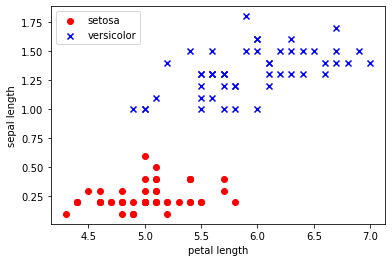

In [34]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [41]:
class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
          err = 0
          for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
          self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

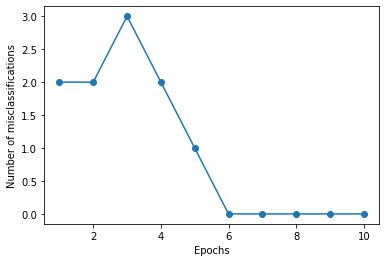

In [42]:
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [44]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


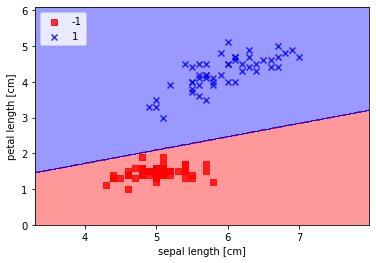

In [46]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show();

## Challenge

You will apply the perceptron to a dataset during today's assignment.

# Sources
Knowledge doesn't come out of a vacuum. Neither does our code. We build off the work of other incredibly intelligent and harding work people. The academic and impementation sections are our way of saying **Thank You** to them. The external review material is stuff we've watched or read in the past we think could also help you. 

## Academic References
(i.e. Theory and research we referenced in preparing this content)
- McCulloch, W.S. & Pitts, W. Bulletin of Mathematical Biophysics (1943) 5: 115. https://doi.org/10.1007/BF02478259
- Rosenblatt, F. (1958). The perceptron: A probabilistic model for information storage and organization in the brain. Psychological Review, 65(6), 386–408. https://doi.org/10.1037/h0042519
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning.

## Implementation References
(i.e. Stuff we used / referenced to make the code in this notebook)
- [NN-SVG](http://alexlenail.me/NN-SVG/index.html) by Alex Lenail. Used to generate diagrams for this notebook. 
- Alammar, Jay (2016). The Illustrated Transformer [A Visual and Interactive Guide to the Basics of Neural Networks](https://jalammar.github.io/visual-interactive-guide-basics-neural-networks/).
- [SINGLE LAYER NEURAL NETWORK - PERCEPTRON MODEL ON THE IRIS DATASET USING HEAVISIDE STEP ACTIVATION FUNCTION](https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php) by K Hong. For Perceptron Demo.

## External Review Material
(i.e. Stuff we recommend watching to go to the next level of understanding)

- [3 Blue 1 Brown Neural Network Videos](https://youtu.be/aircAruvnKk)
- [Andrew Ng Neural Network Introduction Videos](https://www.youtube.com/watch?v=1ZhtwInuOD0&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=43)